### Import the libraries

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import the dataset

In [65]:
df = pd.read_csv('UpdatedResumeDataSet.csv')
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


### Exploring Categories

In [66]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

#### Bar Plot

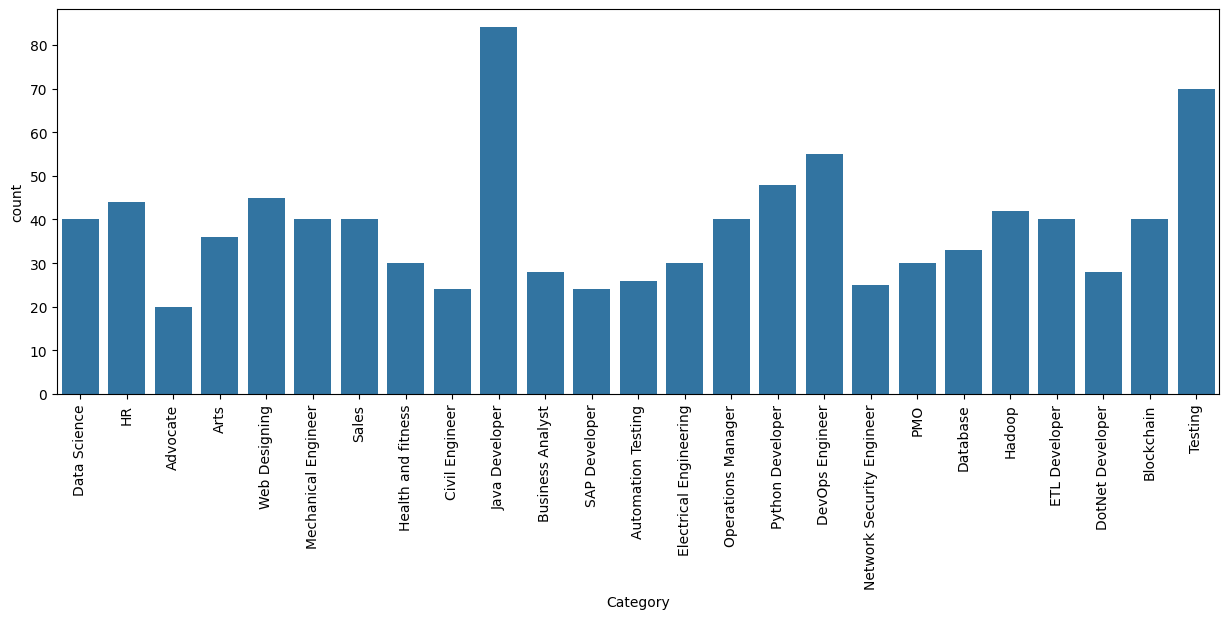

In [67]:
plt.figure(figsize=(15, 5))
# sns.countplot(df['Category']) // horizontal plot
sns.countplot(x='Category',data=df)
plt.xticks(rotation=90)
plt.show()

#### Pie Chart

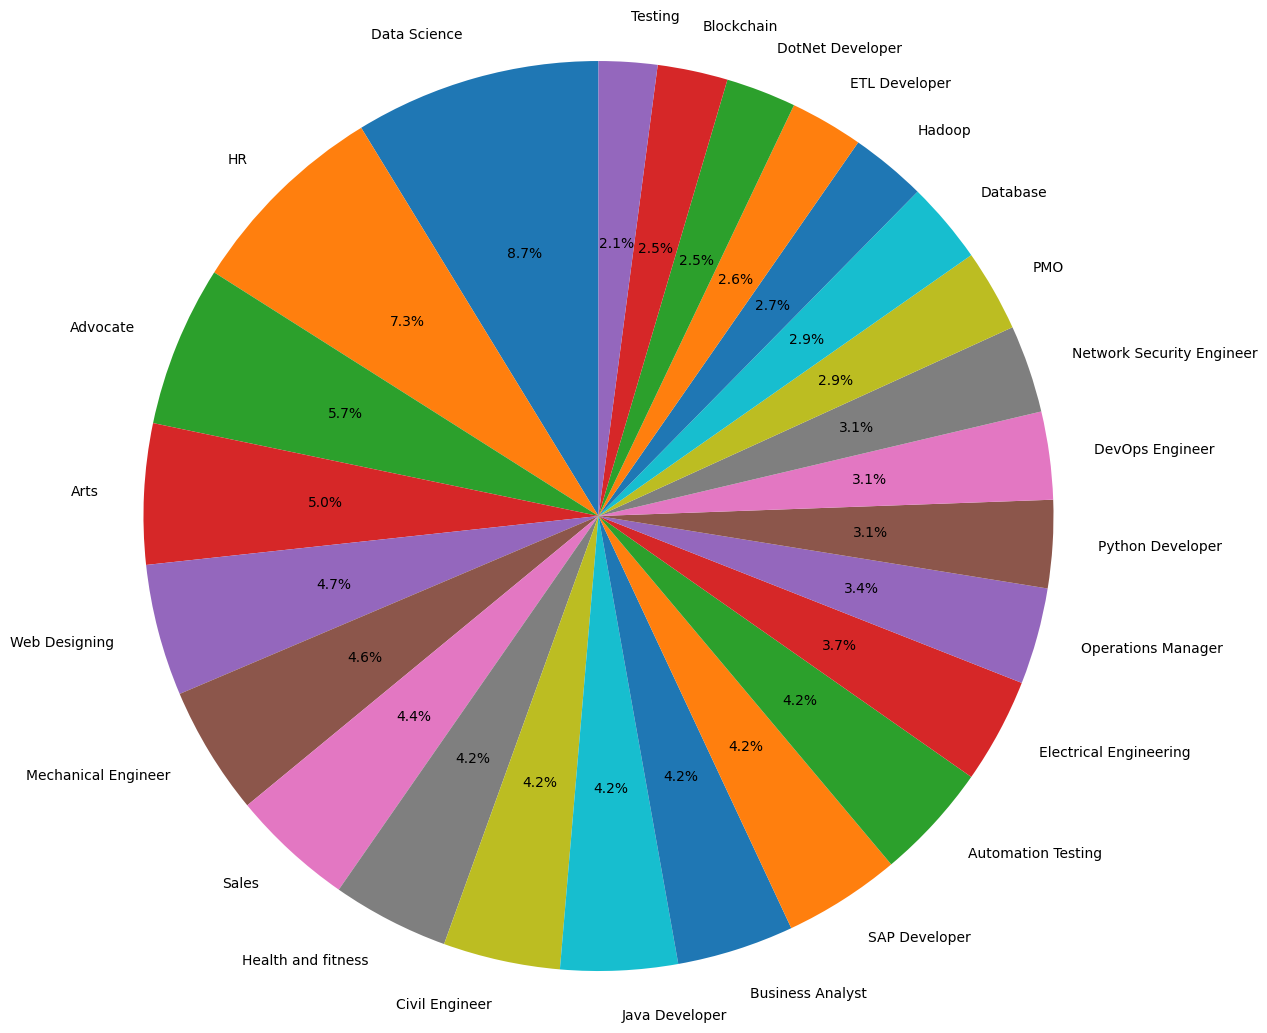

In [68]:
counts = df['Category'].value_counts()
# Labels = counts.index
Labels = df['Category'].unique()

plt.figure(figsize=(15, 13))
plt.pie(counts, labels=Labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()

### Exploring Resume

In [69]:
print(df['Resume'][0])

Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details 

Data Science Assurance Associate 

Data Science Assurance Associate - Ernst & Young LLP
Skill Details 
JAVASCRIPT- Exprience - 24 months
jQuery- Exprience - 24 months
Python- Exprience - 24 monthsCompany Details 
company - Ernst & Young LLP
description - Fraud Investigations and Dispute Services   Assur

### Cleaning Data:
1. URLs
2. hashtags
3. mentions
4. special letters
5. punctuations

In [70]:
import re
import string

def clean_text(text):
    if not isinstance(text, str):
        return text  # In case input is not string

    # 1. Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    
    # 2. Remove mentions (@username)
    text = re.sub(r'@\w+', '', text)
    
    # 3. Remove hashtags (#hashtag)
    text = re.sub(r'#\w+', '', text)

    # 4. Remove non-ASCII characters (special letters/emojis etc.)
    text = re.sub(r'[^\x00-\x7F]+', '', text)

    # 5. Remove punctuations
    text = text.translate(str.maketrans('', '', string.punctuation))

    return text

6. stop words

In [71]:
from nltk.corpus import stopwords

# Load English stopwords from NLTK
stop_words = set(stopwords.words('english'))

# Function to remove stop words from the text
def remove_stop_words(text):
    # clean text
    text = clean_text(text)
    
    # Split the text into words, and filter out stop words
    text = ' '.join([word for word in text.split() if word.lower() not in stop_words])
    text = text.lower()
    return text

In [72]:
df['Resume'] = df['Resume'].apply(lambda x: remove_stop_words(x))
df['Resume'][0]

'skills programming languages python pandas numpy scipy scikitlearn matplotlib sql java javascriptjquery machine learning regression svm nave bayes knn random forest decision trees boosting techniques cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling lda nmf pca neural nets database visualizations mysql sqlserver cassandra hbase elasticsearch d3js dcjs plotly kibana matplotlib ggplot tableau others regular expression html css angular 6 logstash kafka python flask git docker computer vision open cv understanding deep learningeducation details data science assurance associate data science assurance associate ernst young llp skill details javascript exprience 24 months jquery exprience 24 months python exprience 24 monthscompany details company ernst young llp description fraud investigations dispute services assurance technology assisted review tar technology assisted review assists accelerating review process run anal

### Split the data

In [73]:
X = df['Resume']
y = df['Category']

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Vectorization

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

### Logistic Regression

In [76]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

LogisticRegression(max_iter=1000)

In [77]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test_vec)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9948186528497409

Classification Report:
                            precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         3
                     Arts       1.00      1.00      1.00         6
       Automation Testing       1.00      1.00      1.00         5
               Blockchain       1.00      1.00      1.00         7
         Business Analyst       1.00      1.00      1.00         4
           Civil Engineer       1.00      1.00      1.00         9
             Data Science       1.00      1.00      1.00         5
                 Database       1.00      1.00      1.00         8
          DevOps Engineer       1.00      0.93      0.96        14
         DotNet Developer       1.00      1.00      1.00         5
            ETL Developer       1.00      1.00      1.00         7
   Electrical Engineering       1.00      1.00      1.00         6
                       HR       1.00      1.00      1.00        12
       